In [1]:
from SCFT_functions import *
from DNA_input import *

import numpy as np
import matplotlib.pyplot as plt

Using cupy


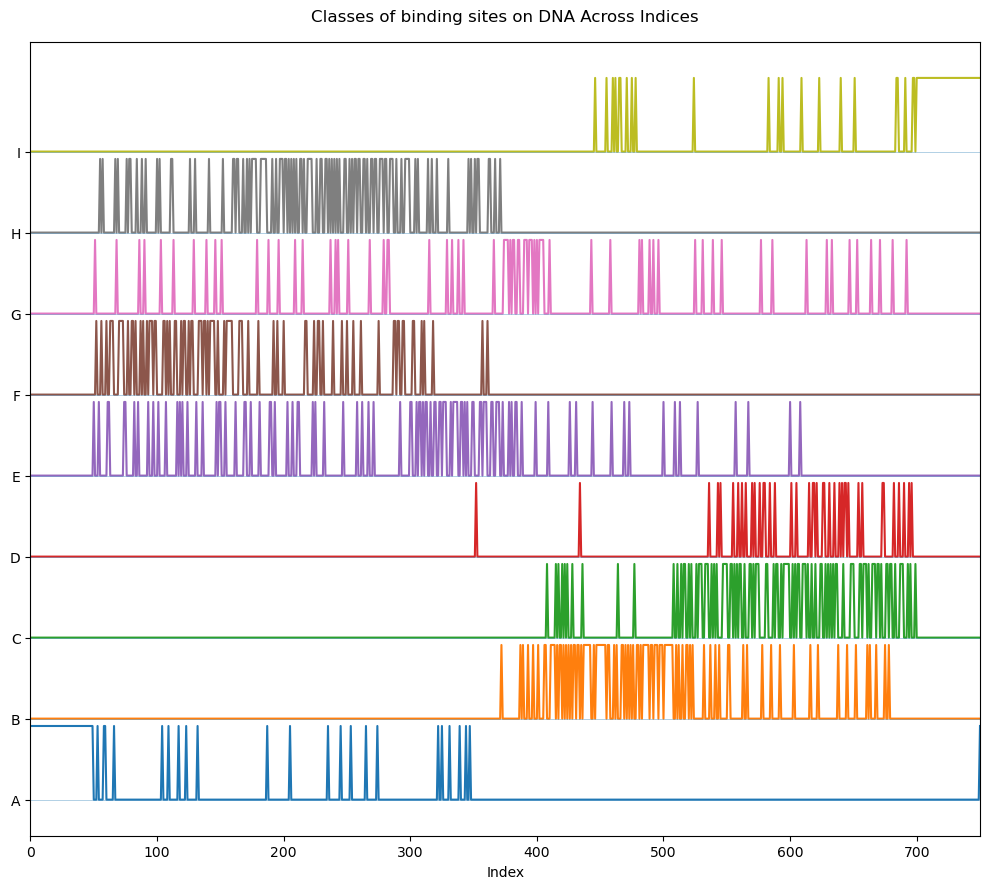

In [2]:
ns = 750
chain_interaction_binary = IMR90_data(ns)

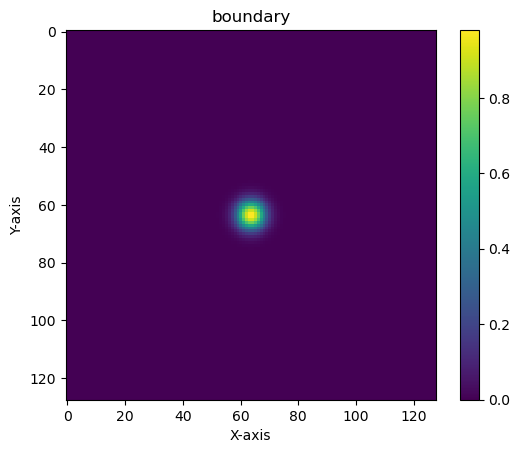

In [14]:
width_gaussian = nx // 4
x = np.linspace(-1, 1, width_gaussian)
y = np.linspace(-1, 1, width_gaussian)
X, Y = np.meshgrid(x, y, indexing='ij')
gaussian = np.exp(-(X**2 + Y**2)/0.1)

boundary = np.zeros((nx,ny))
boundary[nx//2-width_gaussian//2:nx//2+width_gaussian//2,nx//2-width_gaussian//2:nx//2+width_gaussian//2] += gaussian

plt.imshow(boundary, cmap='viridis', interpolation='nearest', aspect=1)
plt.colorbar()  # Adds a color bar to the side
plt.title("boundary")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [4]:
chi_pp = 1.7*np.ones((chain_interaction_binary.shape[0],chain_interaction_binary.shape[0]))
chi_ps = 1.7*np.ones(chain_interaction_binary.shape[0])

N = 1

nx = ny = 128
initial_qsr = np.ones((nx, ny))
L = 30 #dimension of the box

polymer = Scft(
    N = N,
    Lx=L, Ly=L,
    phibar=0.2, # volume fraction of polymer
    l_p=1,
    n_seg=100, # contour length of polymer normalized from 0-1
    nx=nx, ny=ny,
    ns=ns,
    iterations=1000,
    error_tol=1e-12,
    chain_interaction=chain_interaction_binary,
    self_avoiding=0,
    initial_qsr=initial_qsr,
    mixing_rate=0.01,
    chi_polymer_block = chi_pp,
    chi_polymer_s = chi_ps,
    PB = 1,
    close_boundary=False,
)

In [5]:
wsr, qsr_initial, qsr_d_initial, diff = initialization(polymer, seed = 5)

In [9]:
polymer.iterations = 5000
wsr, phi, phi_blocks, qsr, qsr_d, diff = scft_loop(polymer, wsr, qsr_initial, qsr_d_initial, diff)

100%|██████████| 5000/5000 [32:04<00:00,  2.60it/s]


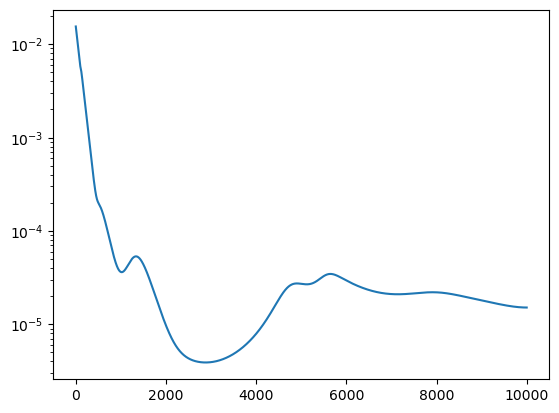

In [10]:
plt.plot(diff)
plt.yscale('log')

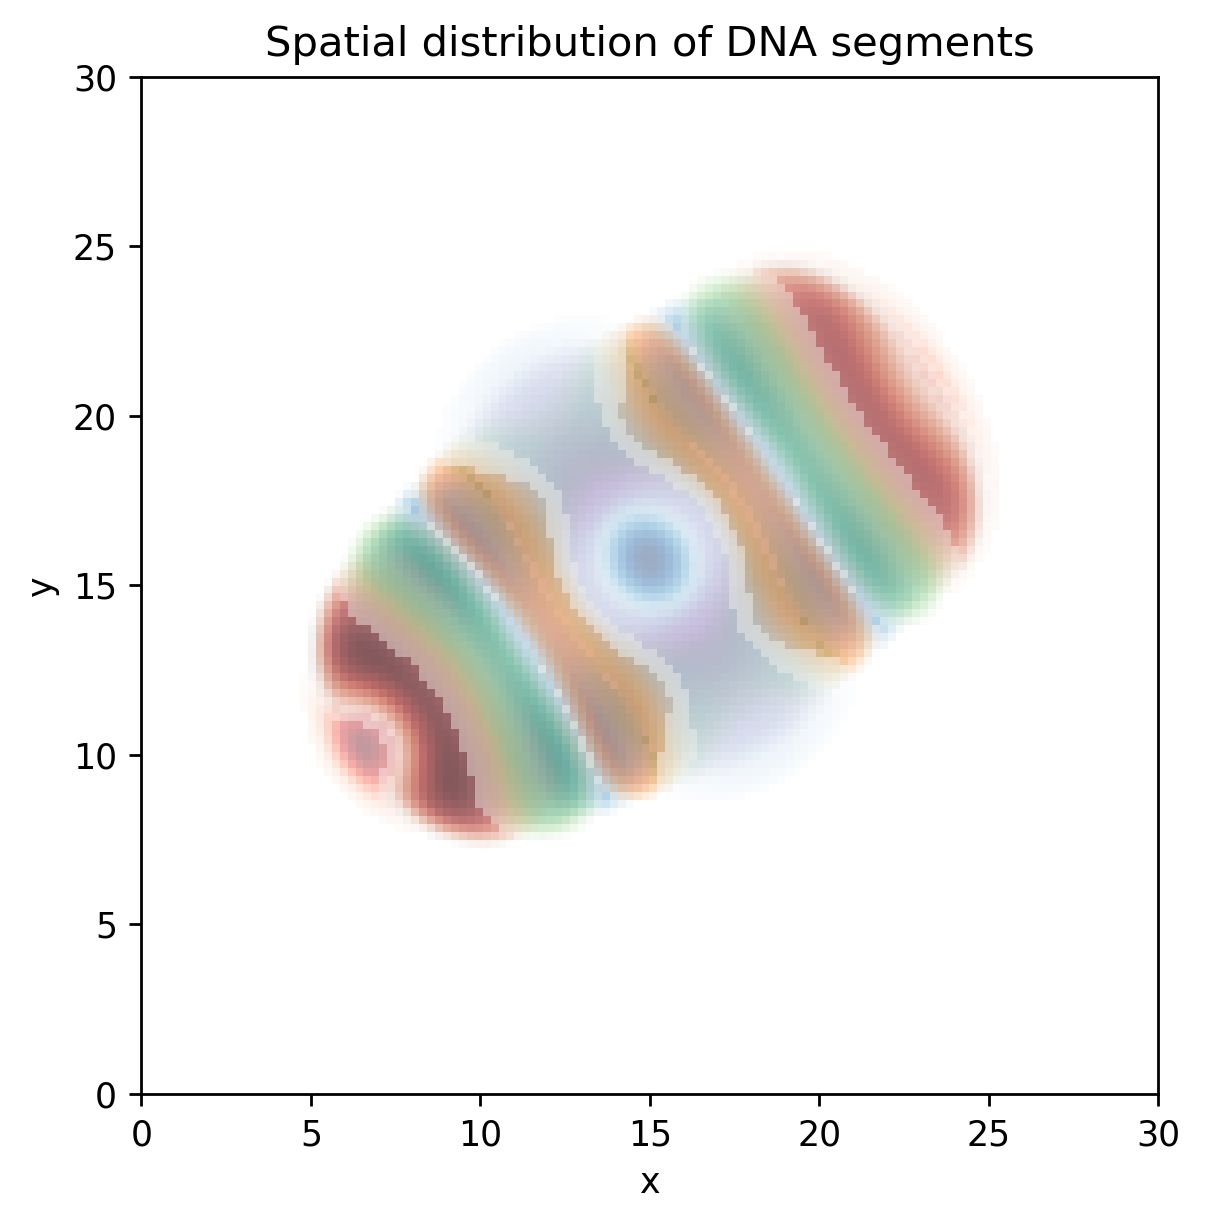

In [11]:
plot_phi_blocks_periodic(np.flip(to_numpy(phi_blocks), axis=0), extent=(0, polymer.Lx, 0, polymer.Ly), percentile=92, shift_x=0, shift_y=0)

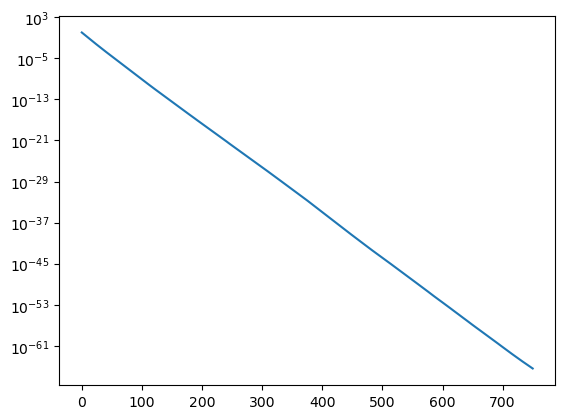

In [12]:
qsr_decay = np.mean(qsr, axis = (1,2))
plt.plot(to_numpy(qsr_decay))
plt.yscale('log')

In [ ]:
polymer.mixing_rate=0.1
polymer.iterations=1000
wsr, phi, phi_blocks, qsr, qsr_d, diff = scft_loop(polymer, wsr, qsr_initial, qsr_d_initial, diff)